In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Build a classifier to detect the Iris-Virginica type
#               based only on the petal width feature.
# upload the dataset 
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [22]:
#Petal width
X = iris["data"][:, 3:] 
# 1 if Iris-Virginica, else 0
y = (iris["target"] == 2).astype(int) 

In [8]:
#Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

[Text(0.5, 0, 'Petal width'), Text(0, 0.5, 'Probability')]

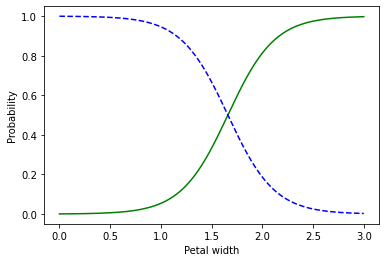

In [9]:
# Model’s estimated probabilities for flowers with petal widths 
#                                       varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # result with 1 column
y_proba = log_reg.predict_proba(X_new)
ax = plt.axes()
ax.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
ax.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
ax.set(xlabel='Petal width',
       ylabel='Probability')
# Decision boundary at around 1.6 cm where both probabilities are equal to
# 50%:If the petal width is higher than 1.6 cm, the classifier will predict  
# that the flower is an Iris-Virginica, or else it will predict that it 
# is not.

In [10]:
#prediction
y_proba = log_reg.predict([[1.7], [1.5]])
print(y_proba)

[1 0]


In [11]:
# Softmax Regression to classify the iris flowers into all three classes.
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
# Scikit-Learn’s LogisticRegression uses one-versus-all by default 
# set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression 
#Solver is an algorithm to use in the optimization problem. Default is ‘lbfgs’.
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y) # training

LogisticRegression(C=10, multi_class='multinomial')

In [12]:
# Predict for an iris with 5 cm long and 2 cm wide petals
print(softmax_reg.predict([[5, 2]]))
# Answer is Iris-Virginica (class 2)
# with 94.2% probability
softmax_reg.predict_proba([[5, 2]])

[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])